# Can we predict which zipcode is next to experience explosive growth?

To answer this question, we will take the average airbnb features in 2019 and see if we can build a model that classifies each zipcode as high, low or moderate growth in 2020.

## Load Libraries and Dataframe

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
airbnb_class_df = pd.read_csv("large_clean_data/airbnb_model_data_clean.csv", index_col=0)
zillow_class_df = pd.read_csv("cleaned_data/zillow_model_data_clean.csv", index_col=0)

In [3]:
airbnb_class_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
151947,2015-06-29,6422,12172,0,1.0,37206.0,36.173151,-86.735813,2,1.0,...,0,0,0,0,0,0,0,0.7,745.208333,0
87,2015-10-03,6422,12172,0,1.0,37206.0,36.173151,-86.735813,2,1.0,...,0,0,0,0,0,0,0,0.7,745.208333,0
205880,2016-09-06,6422,12172,1,1.0,37206.0,36.173151,-86.735813,2,1.0,...,0,0,0,0,0,0,0,0.7,745.208333,0
209372,2017-09-14,6422,12172,0,1.0,37206.0,36.173151,-86.735813,2,1.0,...,0,0,0,0,0,0,0,0.7,745.208333,0
113349,2018-04-14,6422,12172,1,1.0,37206.0,36.173151,-86.735813,2,1.0,...,0,0,0,0,0,0,0,0.7,851.666667,0


In [4]:
zillow_class_df

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,37141,38454,37057,37016,38567,37151,38552,37152,37140,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN,109399.880435
1996-02-01,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN,109566.967391
1996-03-01,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN,109809.858696
1996-04-01,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN,110273.195652
1996-05-01,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN,110767.663043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,321959.0,238371.0,291541.0,247622.0,506703.0,287540.0,360988.0,267956.0,...,216270.0,156813.0,136128.0,196512.0,166713.0,156146.0,126236.0,235094.0,175110.0,288751.259615
2020-11-01,261394.0,295822.0,327365.0,240257.0,293749.0,249687.0,512290.0,291682.0,363554.0,269825.0,...,218049.0,158826.0,136663.0,196971.0,167100.0,156890.0,126264.0,238528.0,177055.0,291187.711538
2020-12-01,264071.0,299249.0,332140.0,241925.0,296529.0,252005.0,518804.0,295491.0,366496.0,272156.0,...,219840.0,161071.0,137790.0,198081.0,167797.0,158137.0,126226.0,242451.0,177552.0,293967.509615


## Add % Increases in Zipcode Prices

In [5]:
zillow_class_df = zillow_class_df.T
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
37013,109670.000000,110113.000000,110502.000000,111295.000000,112128.000000,112982.000000,113867.000000,114736.000000,115551.000000,116199.000000,...,251507.00,252671.00,253906.000000,255162.000000,257001.000000,259031.000000,261394.000000,264071.000000,266303.000000,268556.000000
37211,106734.000000,107099.000000,107465.000000,108224.000000,108963.000000,109639.000000,110367.000000,111082.000000,111876.000000,112514.000000,...,282124.00,283913.00,285863.000000,287953.000000,290494.000000,293072.000000,295822.000000,299249.000000,302286.000000,305349.000000
37075,138933.000000,139381.000000,140085.000000,141375.000000,142817.000000,144082.000000,145445.000000,146630.000000,147829.000000,148737.000000,...,309049.00,310372.00,312097.000000,313768.000000,317473.000000,321959.000000,327365.000000,332140.000000,337490.000000,344421.000000
38401,96857.000000,97144.000000,97433.000000,97997.000000,98505.000000,98876.000000,99176.000000,99412.000000,99541.000000,99683.000000,...,229911.00,231713.00,233094.000000,234462.000000,236156.000000,238371.000000,240257.000000,241925.000000,243219.000000,244825.000000
37128,113158.000000,113284.000000,113470.000000,113974.000000,114588.000000,115269.000000,115989.000000,116728.000000,117504.000000,118271.000000,...,283084.00,285083.00,286883.000000,288171.000000,289714.000000,291541.000000,293749.000000,296529.000000,300063.000000,303777.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,67996.000000,67665.000000,67587.000000,67163.000000,67058.000000,67093.000000,67431.000000,67678.000000,67417.000000,67352.000000,...,153947.00,154307.00,154702.000000,155258.000000,155945.000000,156146.000000,156890.000000,158137.000000,160025.000000,161658.000000
38552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123610.00,124530.00,125302.000000,125829.000000,126088.000000,126236.000000,126264.000000,126226.000000,126329.000000,126262.000000
37152,142441.000000,142789.000000,143113.000000,143664.000000,144220.000000,145047.000000,145783.000000,145725.000000,146104.000000,146220.000000,...,221599.00,225053.00,227110.000000,230542.000000,232892.000000,235094.000000,238528.000000,242451.000000,247005.000000,251824.000000
37140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174218.00,173689.00,173042.000000,172364.000000,173759.000000,175110.000000,177055.000000,177552.000000,178666.000000,179792.000000


In [6]:
zillow_class_df['20_21_inc'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2020-02-01'])-1)*100
zillow_class_df['19_20_inc'] = ((zillow_class_df['2020-02-01']/zillow_class_df['2019-02-01'])-1)*100

In [7]:
zillow_class_df['CAGR'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2016-02-01'])**(1/5)-1)*100

In [8]:
# decided to use 20-21 increase as our growth measure
zillow_class_df['20_21_inc'].describe()

count    105.000000
mean       8.822197
std        3.131870
min       -4.101828
25%        7.613578
50%        9.194465
75%       10.670426
max       16.034558
Name: 20_21_inc, dtype: float64

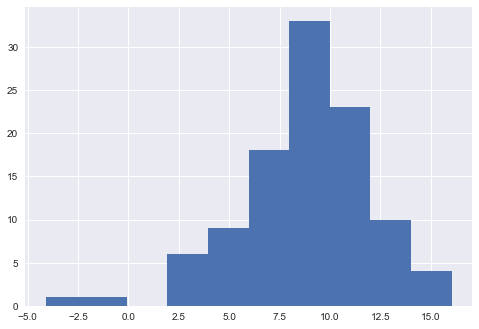

In [9]:
zillow_class_df['20_21_inc'].hist()

In [10]:
def growth_category(x):
    if x < 9:
        return 'low'
    elif x > 11:
        return 'high'
    else:
        return 'moderate'

In [11]:
zillow_class_df['growth'] = zillow_class_df['20_21_inc'].apply(lambda x: growth_category(x))

In [12]:
zillow_class_df['growth'].value_counts()

low         49
moderate    33
high        23
Name: growth, dtype: int64

## Create a dictionary of zipcodes and growth categories

In [13]:
growth_zips = dict(zip(list(zillow_class_df.index),list(zillow_class_df.growth)))

## Create Dataframe of 2019 Airbnb Data by Zipcode

In [14]:
airbnb_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 151947 to 99590
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   host_listings_count               233369 non-null  float64
 5   zipcode                           233369 non-null  float64
 6   latitude                          233369 non-null  float64
 7   longitude                         233369 non-null  float64
 8   accommodates                      233369 non-null  int64  
 9   bathrooms                         233369 non-null  float64
 10  beds                              233369 non-null  float64
 11  price                             233369 non-nul

In [15]:
airbnb_class_df['last_scraped'] = pd.to_datetime(airbnb_class_df['last_scraped'])
airbnb_class_df.set_index('last_scraped',inplace=True)

In [16]:
airbnb_monthly = airbnb_class_df.resample('MS').mean()
airbnb_annual = airbnb_class_df.resample('Y').mean()

In [17]:
zipcode_class_df = airbnb_class_df.groupby('zipcode').sum()
zipcode_class_df

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,72577309334,361905047778,972,13819.0,1.024581e+05,-2.462503e+05,12251,4408.5,6712.0,345434.00,...,0,0,0,0,641,10,0,-1220.843503,-3.482232e+06,844
37015.0,595604787,2286507735,23,252.0,1.304405e+03,-3.129073e+03,96,38.0,57.0,3629.00,...,0,0,0,0,0,0,36,9.328880,3.494134e+04,7
37020.0,263181639,1988349055,0,91.0,2.533685e+02,-6.074133e+02,114,24.5,39.0,3732.00,...,0,0,0,0,0,0,0,3.372646,5.599041e+04,7
37026.0,39642501,121235121,0,534.0,3.619281e+01,-8.672556e+01,4,1.0,2.0,155.00,...,0,0,0,0,0,0,0,0.000000,0.000000e+00,1
37027.0,6307181012,21100495037,180,1914.0,1.463199e+04,-3.523070e+04,1640,531.0,926.0,53590.00,...,74,0,0,0,332,0,0,-196.731720,-6.353011e+05,82
37029.0,14866872,133537490,1,41.0,2.908306e+02,-6.939458e+02,46,12.0,16.0,830.00,...,0,0,0,0,0,0,0,-60.738348,-1.755085e+05,8
37064.0,283577834,1399056378,1,27.0,5.400223e+02,-1.305276e+03,76,23.0,34.0,2720.00,...,0,0,0,0,0,0,0,-50.194266,-2.263499e+05,12
37072.0,30151908847,107838280628,607,11243.0,4.746937e+04,-1.133484e+05,6098,1895.5,3173.0,190081.43,...,0,0,216,0,1,0,3,-470.563756,-6.406026e+06,507
37073.0,640300427,4704661581,16,317.0,7.643532e+02,-1.822000e+03,126,21.0,64.0,1790.00,...,0,0,0,0,0,0,0,5.097265,1.389376e+04,1


In [18]:
zipcode_class_df = airbnb_class_df['2019'].groupby('zipcode')
zipcode_class_monthly_df = zipcode_class_df.resample('M').sum()

In [19]:
zipcode_class_monthly_df

id      host_id  host_is_superhost  \
zipcode last_scraped                                               
37013.0 2019-01-31    1767116405   8551343029                 26   
        2019-02-28    1755938936   8370096275                 22   
        2019-03-31    1641778473   7743355394                 21   
        2019-04-30    1697418342   7691877521                 20   
        2019-05-31    2159415319  11020522254                 20   
...                          ...          ...                ...   
37232.0 2019-06-30             0            0                  0   
        2019-07-31             0            0                  0   
        2019-08-31             0            0                  0   
        2019-09-30      38474804     58355472                  0   
37243.0 2019-01-31      59988556     39228095                  1   

                      host_listings_count    zipcode     latitude  \
zipcode last_scraped                                                
37013.0 2019-01-31                  171.0  2850001.0  2775.875495   
        2019-02-28                  170.0  2812988.0  2739.942842   
        2019-03-31                  154.0  2664936.0  2595.740680   
        2019-04-30                  161.0  2627923.0  2559.571080   
        2019-05-31                  175.0  3183118.0  3100.330060   
...                                   ...        ...          ...   
37232.0 2019-06-30                    0.0        0.0     0.000000   
        2019-07-31                    0.0        0.0     0.000000   
        2019-08-31                    0.0        0.0     0.000000   
        2019-09-30                    2.0    37232.0    36.149930   
37243.0 2019-01-31                    9.0    74486.0    72.333809   

                        longitude  accommodates  bathrooms   beds  ...  \
zipcode last_scraped                                               ...   
37013.0 2019-01-31   -6672.015945           356      126.0  196.0  ...   
        2019-02-28   -6585.435346           346      123.5  191.0  ...   
        2019-03-31   -6238.745060           326      116.5  182.0  ...   
        2019-04-30   -6151.917140           317      113.5  180.0  ...   
        2019-05-31   -7451.688920           398      136.5  232.0  ...   
...                           ...           ...        ...    ...  ...   
37232.0 2019-06-30       0.000000             0        0.0    0.0  ...   
        2019-07-31       0.000000             0        0.0    0.0  ...   
        2019-08-31       0.000000             0        0.0    0.0  ...   
        2019-09-30     -86.813110             2        2.0    1.0  ...   
37243.0 2019-01-31    -173.565999            12        5.0    8.0  ...   

                      neighborhood_Midtown  neighborhood_North_Nashville  \
zipcode last_scraped                                                       
37013.0 2019-01-31                       0                             0   
        2019-02-28                       0                             0   
        2019-03-31                       0                             0   
        2019-04-30                       0                             0   
        2019-05-31                       0                             0   
...                                    ...                           ...   
37232.0 2019-06-30                       0                             0   
        2019-07-31                       0                             0   
        2019-08-31                       0                             0   
        2019-09-30                       0                             1   
37243.0 2019-01-31                       0                             0   

                      neighborhood_Parkwood  neighborhood_South_Nashville  \
zipcode last_scraped                                                        
37013.0 2019-01-31                        0                             0   
        2019-02-28                        0                     

In [20]:
zipcode_class_monthly_df.drop(columns='zipcode', inplace=True)

In [21]:
zipcode_class_monthly_df.reset_index(inplace=True)

In [22]:
zipcode_class_monthly_df['last_scraped'] = pd.to_datetime(zipcode_class_monthly_df['last_scraped'])
zipcode_class_monthly_df.set_index('last_scraped',inplace=True)

In [23]:
zipcode_class_monthly_df_grp = zipcode_class_monthly_df.groupby('zipcode')
zipcode_class_ann_df = zipcode_class_monthly_df_grp.resample('A').mean()

In [24]:
zipcode_class_ann_df

,,zipcode,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,last_scraped,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,37013.0,2.199842e+09,1.118011e+10,26.833333,328.750000,3058.320416,-7350.573946,369.166667,131.916667,209.500000,...,0.000000,0.000000,0.000000,0.000000,20.500000,0.416667,0.000000,-17.890553,-2.491760e+04,24.416667
37015.0,2019-12-31,37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230142,4.150091e+02,0.000000
37026.0,2019-12-31,37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
37027.0,2019-12-31,37027.0,1.982956e+08,6.155288e+08,6.416667,28.916667,414.461105,-997.933056,43.916667,14.625000,25.583333,...,2.083333,0.000000,0.000000,0.000000,9.416667,0.000000,0.000000,1.489615,3.067484e+03,2.500000
37064.0,2019-12-31,37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
37072.0,2019-12-31,37072.0,9.678657e+08,3.564924e+09,18.166667,491.833333,1495.127072,-3570.105354,182.833333,59.208333,96.416667,...,0.000000,0.000000,7.333333,0.000000,0.000000,0.000000,0.166667,1.479783,-2.725824e+04,13.416667
37073.0,2019-12-31,37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547265,1.331677e+03,0.000000
37076.0,2019-12-31,37076.0,1.434272e+09,5.802612e+09,41.416667,488.250000,2764.777564,-6617.522785,296.666667,104.291667,155.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.275456,3.651632e+04,43.000000
37080.0,2019-12-31,37080.0,3.355815e+08,1.337936e+09,3.833333,90.333333,544.729935,-1303.419127,94.416667,32.708333,86.916667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,-0.431562,-6.799776e+01,8.750000


In [25]:
airbnb_2019 = airbnb_class_df['2019-01-01':'2020-01-01']
airbnb_2019

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
last_scraped,,,,,,,,,,,,,,,,,,,,,
2019-01-17,6422,12172,1,1.0,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-02-09,6422,12172,1,1.0,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-03-11,6422,12172,1,1.0,37206.0,36.173150,-86.735810,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-04-14,6422,12172,1,1.0,37206.0,36.173150,-86.735810,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-05-15,6422,12172,1,1.0,37206.0,36.173150,-86.735810,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,40775036,101426897,1,131.0,37204.0,36.131230,-86.781990,12,5.0,12.0,...,0,0,0,1,0,0,0,-6.115203,-185818.072725,1
2019-12-16,40777622,6675690,1,42.0,37212.0,36.132270,-86.803380,16,6.0,13.0,...,1,0,0,0,0,0,0,-4.339821,-132002.893214,1
2019-12-16,40802632,180346882,0,0.0,37214.0,36.117930,-86.627200,2,1.0,2.0,...,0,0,0,0,0,0,0,0.000000,0.000000,0


In [26]:
airbnb_dec_19 = airbnb_class_df['2019-12']
airbnb_dec_19_sum = airbnb_dec_19.groupby('zipcode').sum()

In [27]:
airbnb_dec_19_sum

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2644044233,13556339658,34,648.0,3280.609710,-7884.777140,369,136.5,202.0,9612.0,...,0,0,0,0,19,0,0,18.328985,4.555828e+04,28
37015.0,16367890,76664807,1,1.0,36.233650,-86.906450,2,1.0,1.0,55.0,...,0,0,0,0,0,0,1,0.000000,0.000000e+00,0
37027.0,237962112,526091990,6,60.0,432.475510,-1041.298860,51,16.5,28.0,1228.0,...,2,0,0,0,10,0,0,2.494529,5.981942e+03,4
37072.0,1119952946,3987505676,23,640.0,1670.666280,-3989.124930,225,68.0,118.0,6473.0,...,0,0,6,0,0,0,0,7.031615,2.695094e+04,19
37073.0,30593043,229171323,1,1.0,36.397830,-86.761820,6,1.0,2.0,80.0,...,0,0,0,0,0,0,0,0.000000,0.000000e+00,0
37076.0,1752679915,7637026701,53,490.0,2894.303130,-6927.736310,315,107.0,166.0,7610.0,...,0,0,0,0,0,0,0,8.380852,2.717500e+04,41
37080.0,371110851,1460525872,7,64.0,544.734220,-1303.373580,102,36.5,93.0,5344.0,...,0,0,0,0,0,0,15,3.372646,1.577771e+04,7
37115.0,1576935152,5344651305,40,973.0,2501.853360,-5983.209630,365,110.0,201.0,10824.0,...,0,0,0,0,0,0,0,19.028985,7.369683e+04,24
37138.0,851822593,3535421189,12,1938.0,1159.863500,-2772.245380,143,51.0,77.0,7609.0,...,0,0,0,0,0,0,0,3.569911,7.172365e+03,15


In [28]:
airbnb_2019_zips = airbnb_2019.groupby('zipcode').mean()
airbnb_2019_zips

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,0.316306,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.000000,0.000000,0.000000,0.000000,0.241650,0.004912,0.000000,-0.210891,-293.724151,0.287819
37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230142,415.009096,0.000000
37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
37027.0,1.724309e+07,5.352425e+07,0.557971,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.181159,0.000000,0.000000,0.000000,0.818841,0.000000,0.000000,0.129532,266.737754,0.217391
37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
37072.0,2.351091e+07,8.659735e+07,0.441296,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.000000,0.000000,0.178138,0.000000,0.000000,0.000000,0.004049,0.035946,-662.143520,0.325911
37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547265,1331.677187,0.000000
37076.0,1.876910e+07,7.593386e+07,0.541985,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160638,477.858002,0.562704
37080.0,2.237210e+07,8.919574e+07,0.255556,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.028771,-4.533184,0.583333


In [29]:
cat_cols = ['host_is_superhost','multi_listing_host','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [30]:
#categorical_sums = airbnb_dec_19_sum[cat_cols]
categorical_sums = zipcode_class_ann_df[cat_cols].reset_index()
categorical_sums.set_index('zipcode',inplace=True)
categorical_sums

,last_scraped,host_is_superhost,multi_listing_host,instant_bookable,neighborhood_Bellevue,neighborhood_Donelson,neighborhood_Downtown,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,26.833333,24.416667,55.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.500000,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000
37015.0,2019-12-31,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
37026.0,2019-12-31,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37027.0,2019-12-31,6.416667,2.500000,5.916667,0.000000,0.000000,0.000000,0.000000,0.000000,2.083333,...,9.416667,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000
37064.0,2019-12-31,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37072.0,2019-12-31,18.166667,13.416667,27.000000,0.000000,0.000000,0.000000,0.000000,33.666667,0.000000,...,0.000000,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000
37073.0,2019-12-31,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37076.0,2019-12-31,41.416667,43.000000,37.750000,0.000000,75.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333
37080.0,2019-12-31,3.833333,8.750000,12.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000


In [31]:
airbnb_2019_zips.drop(columns=cat_cols, inplace=True)
airbnb_2019_zips = pd.concat([airbnb_2019_zips,categorical_sums], axis=1)

In [32]:
airbnb_2019_zips

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,4.185658,...,20.500000,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000
37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,17.123188,...,9.416667,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000
37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,3.135628,...,0.000000,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000
37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,9.000000,...,0.000000,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333
37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.983333,...,0.000000,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000


In [33]:
airbnb_2019_zips.drop(columns='last_scraped',inplace=True)

In [34]:
# airbnb_2019_zips.fillna(0, inplace=True)

In [35]:
airbnb_2019_zips.reset_index(inplace=True)

In [36]:
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: str(x))
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: x.replace('.0',''))

In [37]:
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['zipcode'].map(growth_zips)

In [38]:
airbnb_2019_zips.head()

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.416667,0.0,2.666667,57.00,8.25,8.583333,0.0,43.50,0.0,low
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,1.0,0.000000,1.00,0.00,0.000000,0.0,1.00,0.0,high
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,low
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.000000,0.0,1.500000,5.75,1.00,1.250000,0.0,1.75,0.0,moderate
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.0,0.000000,1.00,0.00,0.000000,0.0,0.00,0.0,moderate


In [39]:
airbnb_2019_zips.growth_category.value_counts(dropna=False)

moderate    12
high        11
low         10
NaN          5
Name: growth_category, dtype: int64

In [40]:
# pull in additional zipcodes later
addtl_zips = list(airbnb_2019_zips[airbnb_2019_zips['growth_category'].isnull()].zipcode.value_counts().index)

In [41]:
addtl_zips

['37243', '37222', '37213', '37228', '37232']

In [42]:
# change this later
airbnb_2019_zips.dropna(inplace=True)

In [43]:
growth_labels = {'low':0,'moderate':1,'high':2}
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['growth_category'].map(growth_labels)

In [44]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000,0
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000,1
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,37072,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000,2
6,37073,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
7,37076,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333,1
8,37080,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000,0
9,37086,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [45]:
airbnb_2019_zips.columns

Index(['zipcode', 'id', 'host_id', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'occ_rate',
       'monthly_income', 'host_is_superhost', 'multi_listing_host',
       'instant_bookable', 'neighborhood_Bellevue', 'neighborhood_Donelson',
       'neighborhood_Downtown', 'neighborhood_East_Nashville',
       'neighborhood_Madison', 'neighborhood_Midtown',
       'neighborhood_North_Nashville', 'neighborhood_Parkwood',
       'neighborhood_South_Nashville', 'neighborhood_Southeast_Nashville',
       'neighborhood_West_Nashville', 'neighborhood_Whites_Creek',
       'property_type_

## Train a Baseline Classifier based on 2019 Airbnb Data

### Define functions to be used for modeling

In [46]:
def get_scores(y_test, y_hat_test):
    scores_dict = {'precision':round(precision_score(y_test, y_hat_test, average='weighted'),2),
           'recall': round(recall_score(y_test, y_hat_test, average='weighted'),2),
           'accuracy': round(accuracy_score(y_test, y_hat_test),2),
           'f1': round(f1_score(y_test, y_hat_test,average='weighted'),2)}
    return scores_dict

In [47]:
def run_model(model):
    
    # fit model
    model.fit(X_train, y_train)
    
    # make predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # print classification report
    print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
    print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = plot_confusion_matrix(model, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
    plt.grid(False)
    
    return get_scores(y_test, y_hat_test)

In [48]:
def plot_top_10_features(model, model_name):
    feature_names = X_train.columns
    feature_imports = model.feature_importances_
    most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], 
                                     columns=["Feature", "Importance"]).nlargest(10, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)

    plt.figure(figsize=(12,5))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, 
             align='center', alpha=0.8, color='teal')
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
    plt.xlabel('Importance')
    plt.title(f'Most Important Features - {model_name}', fontsize=12)
    plt.show()

In [49]:
classifier_data = airbnb_2019_zips.drop(columns=['id','host_id','latitude','longitude','neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek'])

In [50]:
y = classifier_data['growth_category']
X = classifier_data.drop(columns=['growth_category','zipcode'])

In [51]:
class_names = np.array(['low','moderate','high'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 16 to 9
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          23 non-null     float64
 1   accommodates                 23 non-null     float64
 2   bathrooms                    23 non-null     float64
 3   beds                         23 non-null     float64
 4   price                        23 non-null     float64
 5   minimum_nights               23 non-null     float64
 6   maximum_nights               23 non-null     float64
 7   availability_30              23 non-null     float64
 8   availability_60              23 non-null     float64
 9   availability_90              23 non-null     float64
 10  number_of_reviews            23 non-null     float64
 11  review_scores_rating         23 non-null     float64
 12  review_scores_accuracy       23 non-null     float64
 13  review_scores_cleanlin

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.20      0.33      0.25         3
    moderate       0.67      0.40      0.50         5
        high       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.29      0.24      0.25        10
weighted avg       0.39      0.30      0.33        10



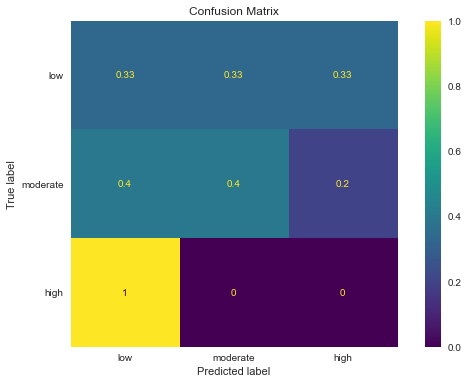

In [57]:
tree_baseline = DecisionTreeClassifier(random_state=3)
tree_baseline.fit(X_train, y_train)
    
    # make predictions
y_hat_train = tree_baseline.predict(X_train)
y_hat_test = tree_baseline.predict(X_test)
    
    # print classification report
print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(tree_baseline, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
plt.grid(False)

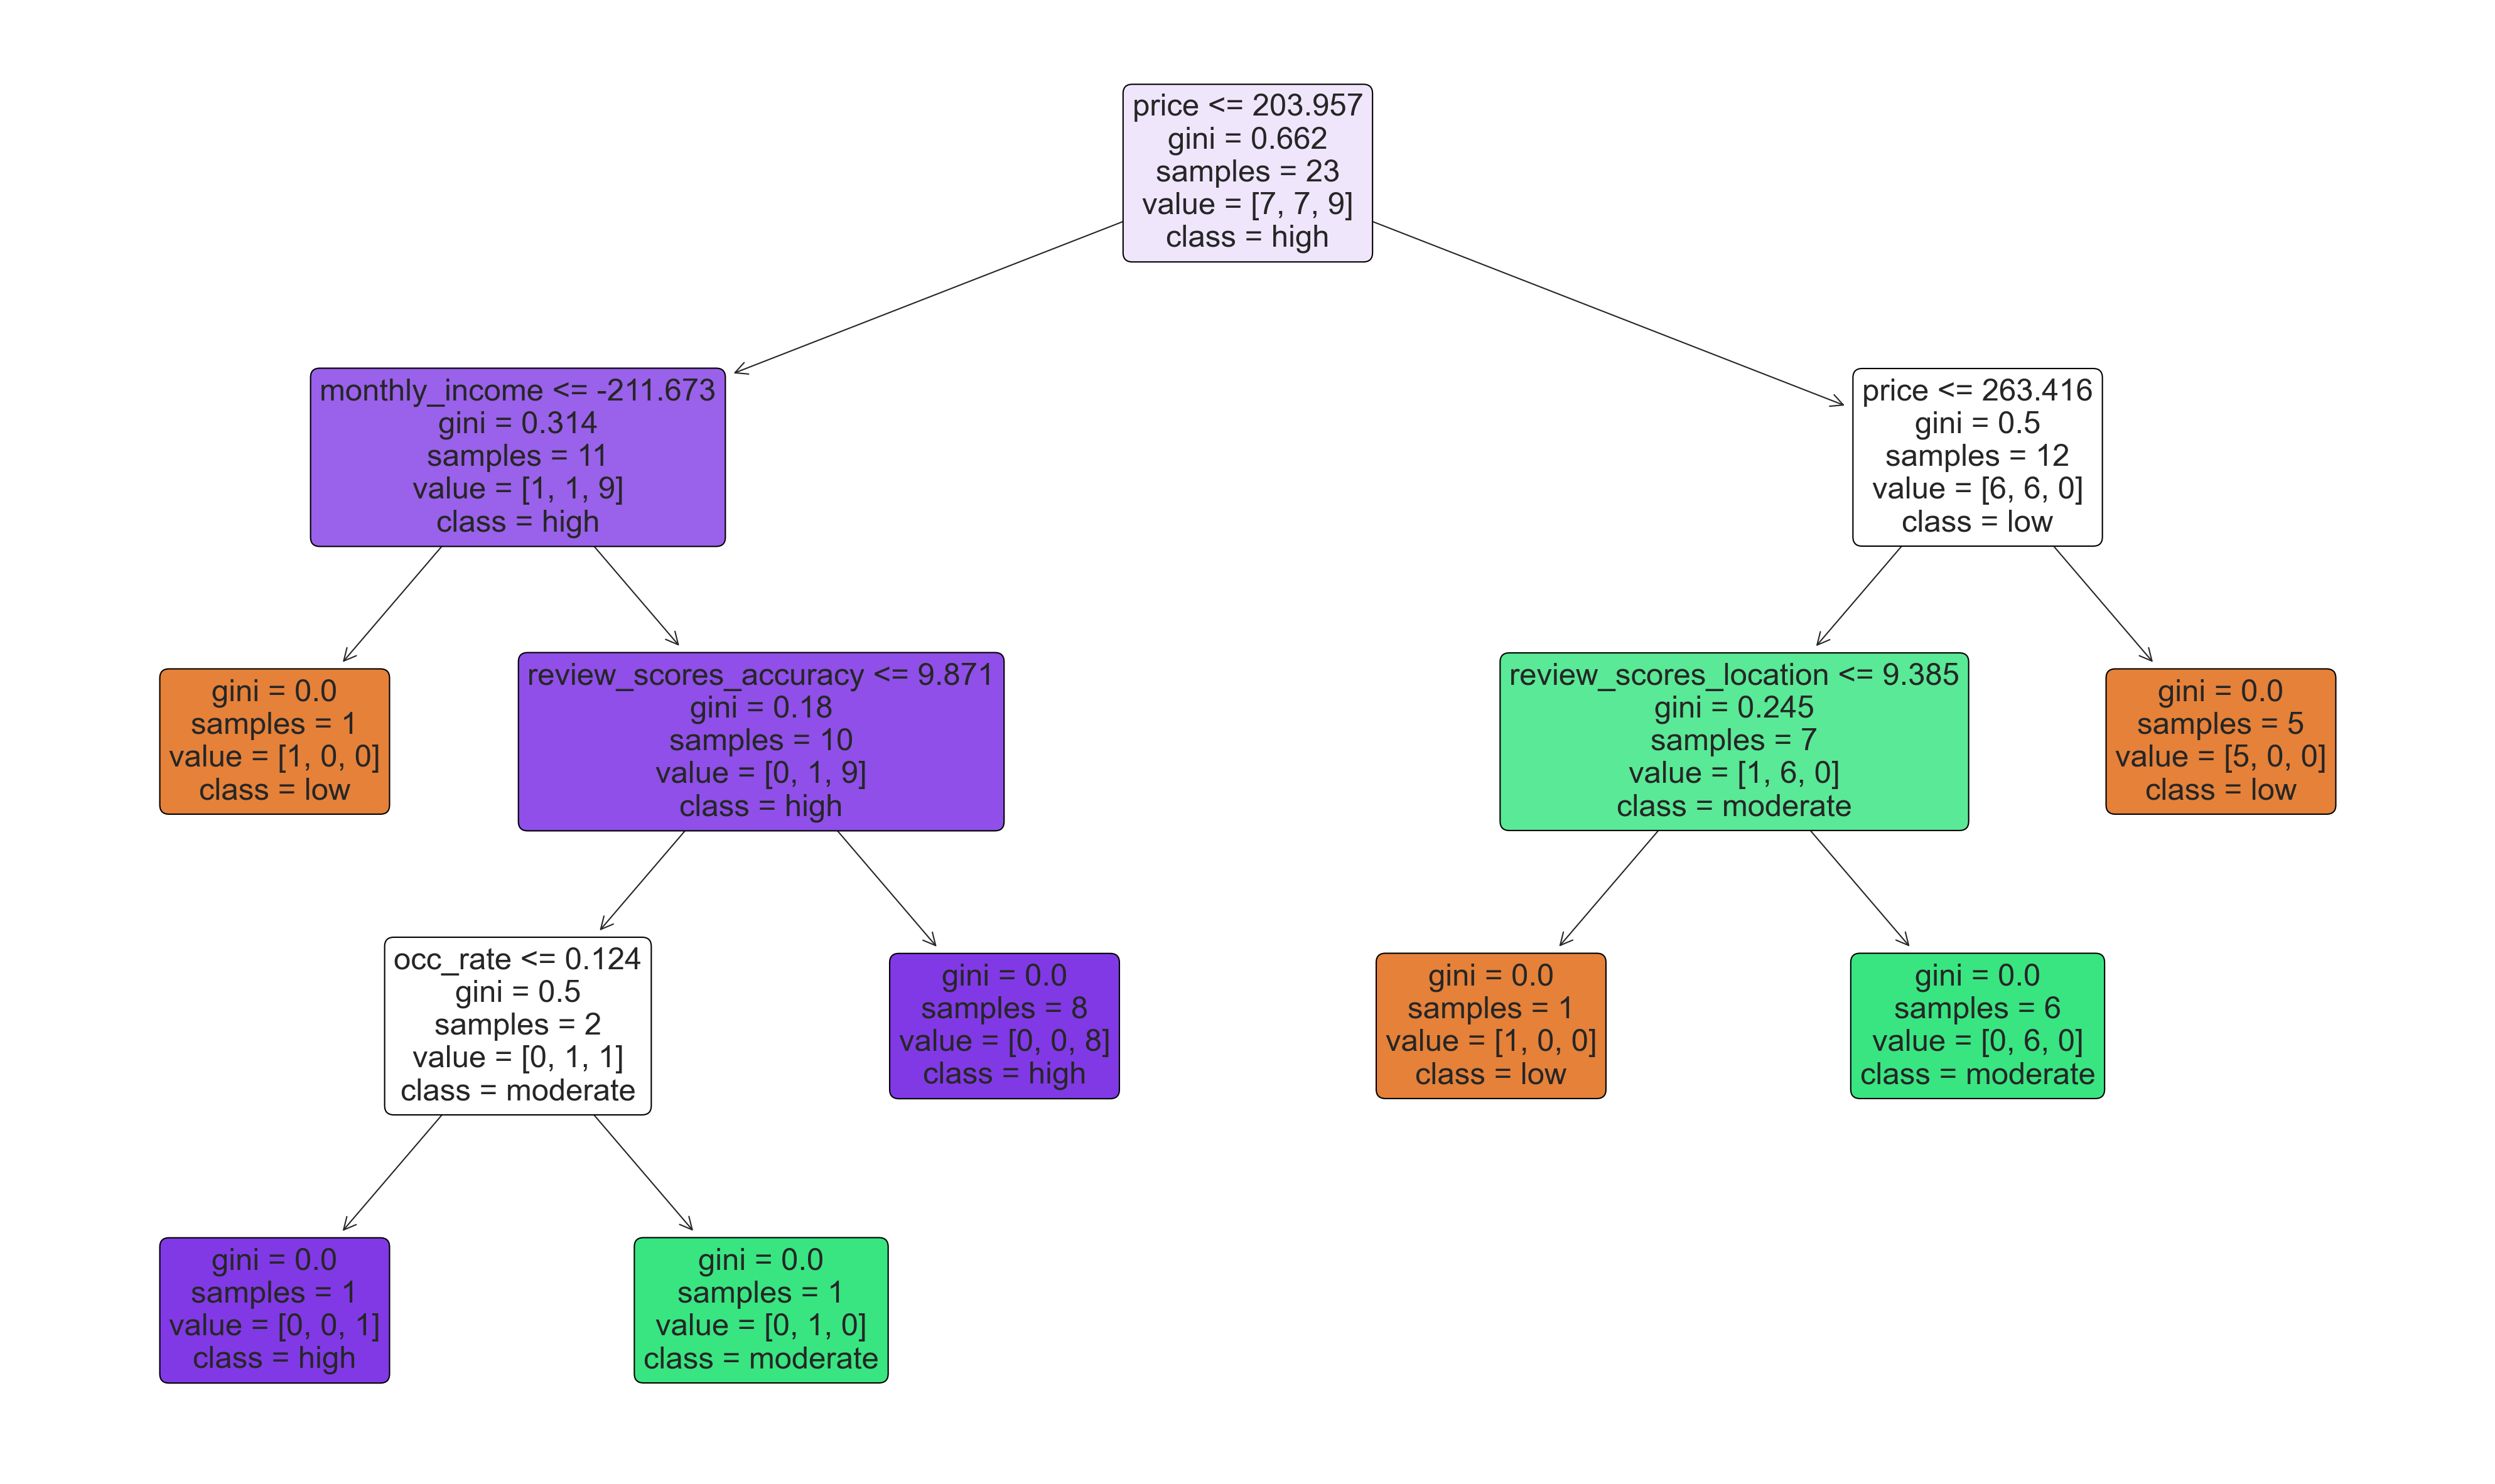

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,6), dpi=500)
plot_tree(tree_baseline,
          feature_names = X.columns, 
          class_names = class_names,
          filled = True, rounded=True)
plt.show()

In [58]:
get_scores(y_test, y_hat_test)

{'precision': 0.39, 'recall': 0.3, 'accuracy': 0.3, 'f1': 0.32}

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.20      0.33      0.25         3
    moderate       0.67      0.40      0.50         5
        high       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.29      0.24      0.25        10
weighted avg       0.39      0.30      0.33        10



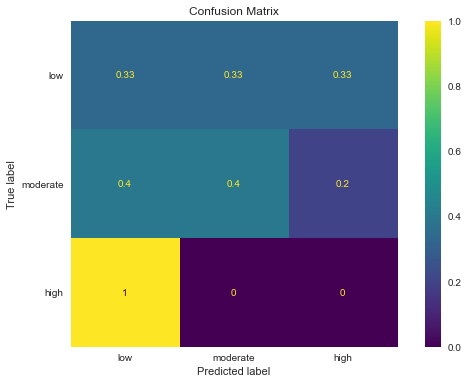

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_baseline = DecisionTreeClassifier(random_state=3)
tree_scores = run_model(tree_baseline)

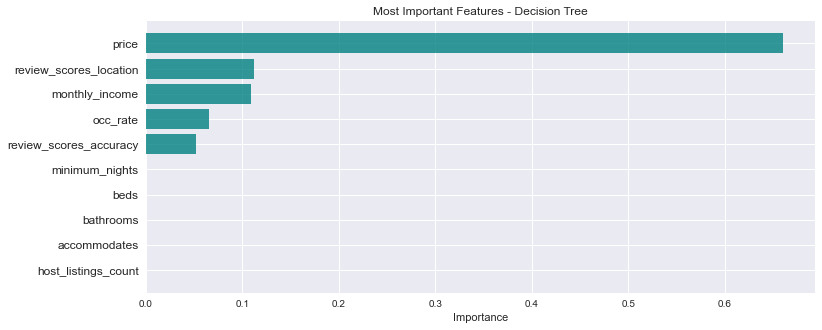

In [60]:
plot_top_10_features(tree_baseline, 'Decision Tree')

## Random Forest Model

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.50      0.33      0.40         3
    moderate       0.60      0.60      0.60         5
        high       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.37      0.31      0.33        10
weighted avg       0.45      0.40      0.42        10



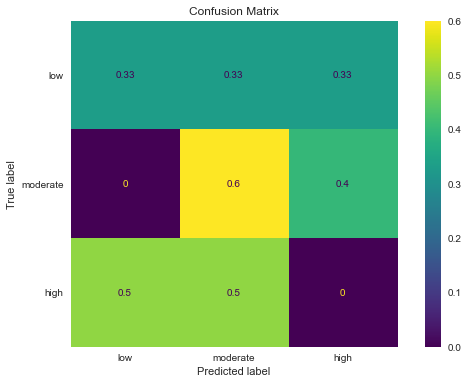

In [61]:
forest = RandomForestClassifier()
forest_scores = run_model(forest)

# Question: Can we predict whether or not an airbnb will be highly available?

## Prepare Data

### Pull in current listings dataframe

In [63]:
current_listings_df = pd.read_csv("cleaned_data/current_listing_availability.csv", index_col=0)

In [64]:
current_listings_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host,available
0,2021-02-20,6422,12172,1,0.0,37206.0,36.17315,-86.73581,2,1.0,...,0,0,0,0,0,0,0.0,0.0,0,217
1,2021-02-20,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,...,0,0,0,0,0,0,0.0,0.0,0,21
2,2021-02-20,136015,666322,0,4.0,37214.0,36.19464,-86.67195,2,1.0,...,0,0,0,0,0,0,0.0,0.0,1,140
3,2021-02-20,258817,22296,1,16.0,37076.0,36.16249,-86.58988,2,1.0,...,0,0,0,0,0,0,0.0,0.0,1,314
4,2021-02-20,289242,22296,1,16.0,37076.0,36.16102,-86.59207,1,1.0,...,0,0,0,0,0,0,0.0,0.0,1,314


### Decide on threshold for 'highly available'

In [65]:
current_listings_df['available'].describe()

count    6144.000000
mean      174.482747
std       111.701149
min         0.000000
25%        74.000000
50%       196.000000
75%       277.000000
max       316.000000
Name: available, dtype: float64

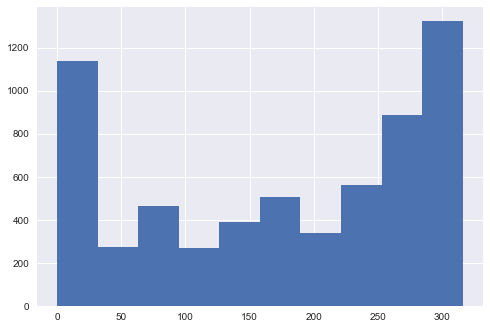

In [66]:
current_listings_df['available'].hist()

Based on InsideAirbnb's methodology, we are going to consider any availability greater than 60 days as highly available.

In [67]:
def convert_availability(x):
    if x > 60:
        # return 1 which will stand for high availability
        return 1
    else:
        # return 0 which will stand for low availability
        return 0

In [68]:
current_listings_df['availability'] = current_listings_df['available'].apply(lambda x: convert_availability(x))

In [69]:
current_listings_df

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host,available,availability
0,2021-02-20,6422,12172,1,0.0,37206.0,36.17315,-86.73581,2,1.0,...,0,0,0,0,0,0.0,0.0,0,217,1
1,2021-02-20,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,...,0,0,0,0,0,0.0,0.0,0,21,0
2,2021-02-20,136015,666322,0,4.0,37214.0,36.19464,-86.67195,2,1.0,...,0,0,0,0,0,0.0,0.0,1,140,1
3,2021-02-20,258817,22296,1,16.0,37076.0,36.16249,-86.58988,2,1.0,...,0,0,0,0,0,0.0,0.0,1,314,1
4,2021-02-20,289242,22296,1,16.0,37076.0,36.16102,-86.59207,1,1.0,...,0,0,0,0,0,0.0,0.0,1,314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2021-02-20,48207668,368944610,0,1813.0,37076.0,36.17157,-86.59580,5,1.0,...,0,0,0,0,0,0.0,0.0,1,247,1
6140,2021-02-21,48208643,359230893,0,643.0,37203.0,36.15664,-86.79764,5,2.0,...,0,0,0,0,0,0.0,0.0,1,233,1
6141,2021-02-20,48211893,153902467,0,0.0,37209.0,36.14538,-86.82469,2,2.0,...,0,0,0,1,0,0.0,0.0,0,95,1
6142,2021-02-20,48224293,368944610,0,1813.0,37214.0,36.17812,-86.64146,3,1.0,...,0,0,0,0,0,0.0,0.0,1,249,1


In [70]:
current_listings_df.availability.value_counts()

1    4759
0    1385
Name: availability, dtype: int64

### Select Feature Columns

Since this classifier is going to be used to predict whether or not a new listing will be highly available, we need to only use features that would be available for a new listing.

In [71]:
current_listings_df.columns

Index(['last_scraped', 'id', 'host_id', 'host_is_superhost',
       'host_listings_count', 'zipcode', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'property_type_Condominium', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'n

In [72]:
current_listings_model_data = current_listings_df[['accommodates','bathrooms','beds','price','instant_bookable',
                                                   'property_type_Condominium', 'property_type_House','property_type_Other',
                                                   'property_type_Townhouse','room_type_Hotel room', 'room_type_Private room',
                                                   'room_type_Shared room', 'neighborhood_Bellevue','neighborhood_Donelson',
                                                   'neighborhood_Downtown','neighborhood_East_Nashville',
                                                   'neighborhood_Madison','neighborhood_Midtown',
                                                   'neighborhood_North_Nashville', 'neighborhood_Parkwood',
                                                   'neighborhood_South_Nashville','neighborhood_Southeast_Nashville',
                                                   'neighborhood_West_Nashville','neighborhood_Whites_Creek','availability']]

## Run Baseline Model

In [73]:
y = current_listings_model_data['availability']
X = current_listings_model_data.drop(columns=['availability'])

In [74]:
class_names = np.array(['low','high'])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Training accuracy score: 0.98
              precision    recall  f1-score   support

         low       0.48      0.30      0.37       412
        high       0.82      0.91      0.86      1432

    accuracy                           0.77      1844
   macro avg       0.65      0.60      0.61      1844
weighted avg       0.74      0.77      0.75      1844



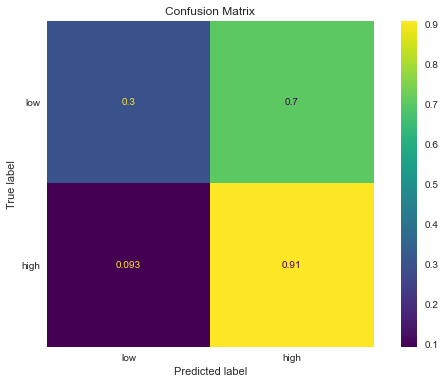

In [77]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
    
    # make predictions
y_hat_train = forest.predict(X_train)
y_hat_test = forest.predict(X_test)
    
    # print classification report
print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(forest, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
plt.grid(False)

## Deal with Class Imbalance

Training accuracy score: 0.99
              precision    recall  f1-score   support

           0       0.45      0.38      0.41       412
           1       0.83      0.86      0.85      1432

    accuracy                           0.76      1844
   macro avg       0.64      0.62      0.63      1844
weighted avg       0.74      0.76      0.75      1844



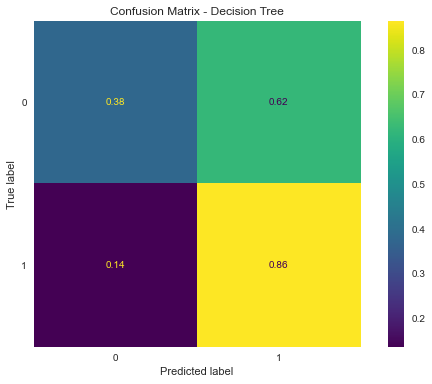

In [78]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# run the model with the resampled training set--have to run outside of the function
smote_model = forest.fit(X_train_resampled, y_train_resampled)

y_hat_train = smote_model.predict(X_train_resampled)
y_hat_test = smote_model.predict(X_test)

print(f'Training accuracy score: {round(accuracy_score(y_train_resampled,y_hat_train),2)}')
    # print classification report
print(classification_report(y_test, y_hat_test))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix - Decision Tree')
disp = plot_confusion_matrix(smote_model, X_test, y_test, ax = ax,
                             normalize='true')
plt.grid(False)

## AdaBoost Model

In [79]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Training accuracy score: 0.77
              precision    recall  f1-score   support

         low       0.32      0.02      0.05       412
        high       0.78      0.99      0.87      1432

    accuracy                           0.77      1844
   macro avg       0.55      0.50      0.46      1844
weighted avg       0.68      0.77      0.69      1844



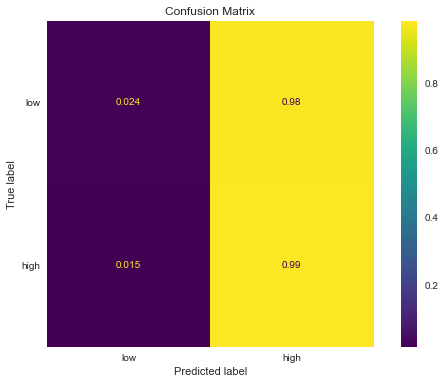

In [80]:
adaboost_clf = AdaBoostClassifier(random_state=42)
ada_scores = run_model(adaboost_clf)

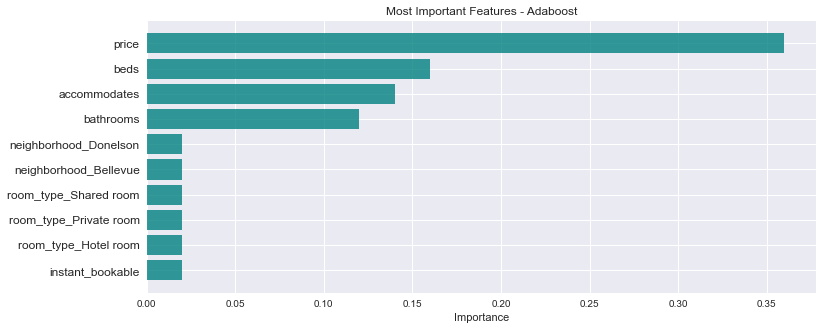

In [81]:
plot_top_10_features(adaboost_clf, 'Adaboost')

## Gradient Boosting Model

Training accuracy score: 0.8
              precision    recall  f1-score   support

         low       0.66      0.10      0.17       412
        high       0.79      0.99      0.88      1432

    accuracy                           0.79      1844
   macro avg       0.72      0.54      0.52      1844
weighted avg       0.76      0.79      0.72      1844



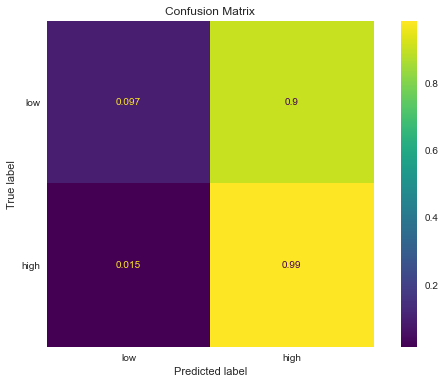

In [82]:
gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_scores = run_model(gbt_clf)

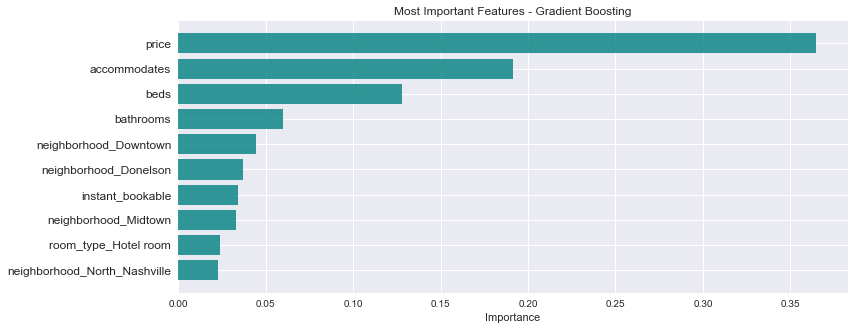

In [83]:
plot_top_10_features(gbt_clf, 'Gradient Boosting')


## XGBoost Model

In [84]:
from xgboost import XGBClassifier

Training accuracy score: 0.92
              precision    recall  f1-score   support

         low       0.50      0.25      0.34       412
        high       0.81      0.93      0.86      1432

    accuracy                           0.78      1844
   macro avg       0.65      0.59      0.60      1844
weighted avg       0.74      0.78      0.75      1844



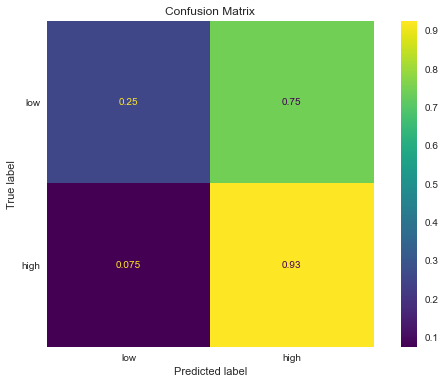

In [85]:
import warnings
warnings.filterwarnings("ignore")

xgb_clf = XGBClassifier(objective ='reg:squarederror', random_state=47)
xgb_scores = run_model(xgb_clf)